Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'num_units': 32, 'optimizer': 'adam'}
3/3 [==============================] - 0s 2ms/step
Train RMSE: 28.08
Test RMSE: 15.59
Train MAE: 19.38
Test MAE: 13.76
Train SMAPE: 17.25
Test SMAPE: 62.02
Train R2: 0.82
Test R2: -0.66
Execution Time: 4.36 seconds
CPU Usage: 24.20 MHz
Memory Used: 435.25 MB

Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'num_units': 32, 'optimizer': 'rmsprop'}
3/3 [==============================] - 0s 2ms/step
Train RMSE: 28.53
Test RMSE: 12.06
Train MAE: 19.36
Test MAE: 10.14
Train SMAPE: 16.75
Test SMAPE: 61.13
Train R2: 0.81
Test R2: 0.01
Execution Time: 4.02 seconds
CPU Usage: 29.70 MHz
Memory Used: 457.65 MB

Hyperparameters: {'activation': 'relu', 'batch_size': 32, 'epochs': 50, 'num_units': 64, 'optimizer': 'adam'}
3/3 [==============================] - 0s 2ms/step
Train RMSE: 28.06
Test RMSE: 14.00
Train MAE: 19.64
Test MAE: 11.67
Train SMAPE: 17.27
Test SMAPE

3/3 [==============================] - 0s 2ms/step
Train RMSE: 28.90
Test RMSE: 16.77
Train MAE: 20.24
Test MAE: 14.63
Train SMAPE: 17.85
Test SMAPE: 62.63
Train R2: 0.81
Test R2: -0.92
Execution Time: 5.61 seconds
CPU Usage: 29.20 MHz
Memory Used: 712.76 MB

Hyperparameters: {'activation': 'relu', 'batch_size': 64, 'epochs': 100, 'num_units': 64, 'optimizer': 'adam'}
3/3 [==============================] - 0s 2ms/step
Train RMSE: 27.80
Test RMSE: 12.88
Train MAE: 19.15
Test MAE: 10.41
Train SMAPE: 16.88
Test SMAPE: 61.29
Train R2: 0.82
Test R2: -0.13
Execution Time: 8.72 seconds
CPU Usage: 41.80 MHz
Memory Used: 719.72 MB

Hyperparameters: {'activation': 'relu', 'batch_size': 64, 'epochs': 100, 'num_units': 64, 'optimizer': 'rmsprop'}
3/3 [==============================] - 0s 2ms/step
Train RMSE: 28.38
Test RMSE: 12.55
Train MAE: 19.30
Test MAE: 10.64
Train SMAPE: 16.76
Test SMAPE: 61.11
Train R2: 0.82
Test R2: -0.07
Execution Time: 8.02 seconds
CPU Usage: 38.70 MHz
Memory Used: 725.24

3/3 [==============================] - 0s 3ms/step
Train RMSE: 29.58
Test RMSE: 11.18
Train MAE: 20.40
Test MAE: 7.72
Train SMAPE: 19.32
Test SMAPE: 72.59
Train R2: 0.80
Test R2: 0.15
Execution Time: 6.70 seconds
CPU Usage: 30.50 MHz
Memory Used: 822.39 MB

Hyperparameters: {'activation': 'tanh', 'batch_size': 64, 'epochs': 50, 'num_units': 128, 'optimizer': 'adam'}
3/3 [==============================] - 0s 5ms/step
Train RMSE: 28.84
Test RMSE: 16.53
Train MAE: 20.89
Test MAE: 14.05
Train SMAPE: 18.33
Test SMAPE: 62.52
Train R2: 0.81
Test R2: -0.86
Execution Time: 9.41 seconds
CPU Usage: 35.30 MHz
Memory Used: 828.64 MB

Hyperparameters: {'activation': 'tanh', 'batch_size': 64, 'epochs': 50, 'num_units': 128, 'optimizer': 'rmsprop'}
3/3 [==============================] - 0s 3ms/step
Train RMSE: 30.64
Test RMSE: 20.43
Train MAE: 23.15
Test MAE: 18.01
Train SMAPE: 19.93
Test SMAPE: 64.69
Train R2: 0.79
Test R2: -1.84
Execution Time: 9.46 seconds
CPU Usage: 46.80 MHz
Memory Used: 832.09 M

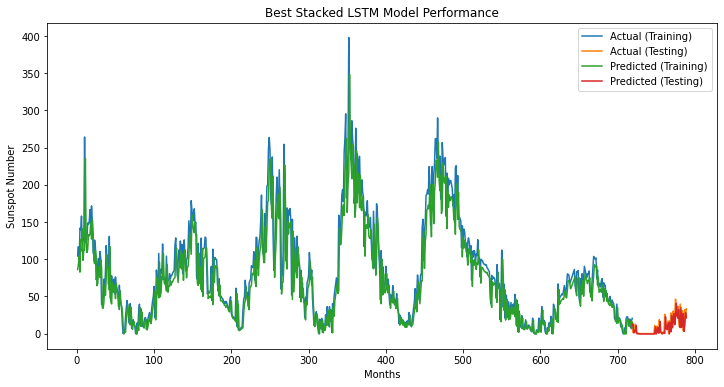

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time
import psutil
from sklearn.model_selection import ParameterGrid

# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]

# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data, num_units, activation, optimizer, batch_size, epochs):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(num_units, return_sequences=True, input_shape=(1, 1), activation=activation))
    model.add(LSTM(num_units, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Record start time
    start_time = time.time()

    # Train the Stacked LSTM model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Record execution time
    execution_time = time.time() - start_time

    # Record CPU usage
    cpu_usage = psutil.cpu_percent()

    # Record memory usage
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # Convert to MB

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage, y_train, train_predictions, y_test, test_predictions


# Define the hyperparameter grid
param_grid = {
    'num_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Perform hyperparameter tuning
best_model = None
best_metrics = None

for params in ParameterGrid(param_grid):
    print("Hyperparameters:", params)

    # Train and evaluate the model
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage, y_train, train_predictions, y_test, test_predictions = train_evaluate_model(
        train_data, test_data, params['num_units'], params['activation'], params['optimizer'], params['batch_size'], params['epochs']
    )

    # Print the evaluation metrics
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print()

    # Keep track of the best model
    if best_metrics is None or test_rmse < best_metrics[1]:
        best_model = params
        best_metrics = (train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage, y_train, train_predictions, y_test, test_predictions)

# Print the best model and its evaluation metrics
print("Best Model:")
print("Hyperparameters:", best_model)
print(f"Train RMSE: {best_metrics[0]:.2f}")
print(f"Test RMSE: {best_metrics[1]:.2f}")
print(f"Train MAE: {best_metrics[2]:.2f}")
print(f"Test MAE: {best_metrics[3]:.2f}")
print(f"Train SMAPE: {best_metrics[4]:.2f}")
print(f"Test SMAPE: {best_metrics[5]:.2f}")
print(f"Train R2: {best_metrics[6]:.2f}")
print(f"Test R2: {best_metrics[7]:.2f}")
print(f"Execution Time: {best_metrics[8]:.2f} seconds")
print(f"CPU Usage: {best_metrics[9]:.2f} MHz")
print(f"Memory Used: {best_metrics[10]:.2f} MB")
print()

# Plot the predictions of the best model
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(best_metrics[11]) + 1), best_metrics[11], label='Actual (Training)')
plt.plot(range(len(best_metrics[11]), len(best_metrics[11]) + len(best_metrics[13])), best_metrics[13], label='Actual (Testing)')
plt.plot(range(1, len(best_metrics[11]) + 1), best_metrics[12], label='Predicted (Training)')
plt.plot(range(len(best_metrics[11]), len(best_metrics[11]) + len(best_metrics[13])), best_metrics[14], label='Predicted (Testing)')
plt.title('Best Stacked LSTM Model Performance')
plt.xlabel('Months')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import ParameterGrid
import time
import psutil


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]


# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data, num_units, activation, optimizer, batch_size, epochs):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(num_units, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(num_units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Train the Stacked LSTM model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    execution_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Get CPU usage and memory usage
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / (1024 ** 2)

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage


# Define hyperparameters for tuning
hyperparameters = {
    'num_units': [32, 64, 128],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

# Generate all combinations of hyperparameters
param_grid = list(ParameterGrid(hyperparameters))

# Initialize variables for best model selection
best_metrics = None
best_model_index = -1

# Iterate over hyperparameter combinations
for i, params in enumerate(param_grid):
    print(f"Training and evaluating Model {i+1}/{len(param_grid)}")

    # Train and evaluate the model
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage = train_evaluate_model(train_data, test_data, **params)

    # Store the metrics and hyperparameters of the best model
    if best_metrics is None or test_rmse < best_metrics[1]:
        best_metrics = (train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage)
        best_model_index = i

    # Print the metrics for the current model
    print("Model Metrics:")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print()


# Print the metrics for the best model
print("Best Model Metrics:")
print(f"Train RMSE: {best_metrics[0]:.2f}")
print(f"Test RMSE: {best_metrics[1]:.2f}")
print(f"Train MAE: {best_metrics[2]:.2f}")
print(f"Test MAE: {best_metrics[3]:.2f}")
print(f"Train SMAPE: {best_metrics[4]:.2f}")
print(f"Test SMAPE: {best_metrics[5]:.2f}")
print(f"Train R2: {best_metrics[6]:.2f}")
print(f"Test R2: {best_metrics[7]:.2f}")
print(f"Execution Time: {best_metrics[8]:.2f} seconds")
print(f"CPU Usage: {best_metrics[9]:.2f} MHz")
print(f"Memory Used: {best_metrics[10]:.2f} MB")
print()


# Plot the RMSE for all models
train_rmses = [param['train_rmse'] for param in param_grid]
test_rmses = [param['test_rmse'] for param in param_grid]

plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_rmses, label='Train RMSE')
plt.bar(range(len(param_grid)), test_rmses, label='Test RMSE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.legend()
plt.show()


# Plot the MAE for all models
train_maes = [param['train_mae'] for param in param_grid]
test_maes = [param['test_mae'] for param in param_grid]

plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_maes, label='Train MAE')
plt.bar(range(len(param_grid)), test_maes, label='Test MAE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE for Different Models')
plt.legend()
plt.show()


# Plot the SMAPE for all models
train_smapes = [param['train_smape'] for param in param_grid]
test_smapes = [param['test_smape'] for param in param_grid]

plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_smapes, label='Train SMAPE')
plt.bar(range(len(param_grid)), test_smapes, label='Test SMAPE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('SMAPE')
plt.title('SMAPE for Different Models')
plt.legend()
plt.show()


# Plot the R2 for all models
train_r2s = [param['train_r2'] for param in param_grid]
test_r2s = [param['test_r2'] for param in param_grid]

plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_r2s, label='Train R2')
plt.bar(range(len(param_grid)), test_r2s, label='Test R2')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 for Different Models')
plt.legend()
plt.show()


Training and evaluating Model 1/48
3/3 [==============================] - 0s 2ms/step
Model Metrics:
Train RMSE: 28.12
Test RMSE: 13.22
Train MAE: 19.55
Test MAE: 10.54
Train SMAPE: 17.15
Test SMAPE: 61.35
Train R2: 0.82
Test R2: -0.19
Execution Time: 7.82 seconds
CPU Usage: 20.60 MHz
Memory Used: 16030.00 MB

Training and evaluating Model 2/48
3/3 [==============================] - 0s 4ms/step
Model Metrics:
Train RMSE: 28.22
Test RMSE: 11.34
Train MAE: 19.03
Test MAE: 8.57
Train SMAPE: 16.99
Test SMAPE: 61.64
Train R2: 0.82
Test R2: 0.12
Execution Time: 8.83 seconds
CPU Usage: 26.70 MHz
Memory Used: 16038.38 MB

Training and evaluating Model 3/48
3/3 [==============================] - 0s 2ms/step
Model Metrics:
Train RMSE: 28.64
Test RMSE: 14.31
Train MAE: 20.52
Test MAE: 11.47
Train SMAPE: 17.81
Test SMAPE: 61.59
Train R2: 0.81
Test R2: -0.39
Execution Time: 12.96 seconds
CPU Usage: 28.90 MHz
Memory Used: 16024.20 MB

Training and evaluating Model 4/48
3/3 [=========================

3/3 [==============================] - 0s 3ms/step
Model Metrics:
Train RMSE: 29.20
Test RMSE: 17.98
Train MAE: 21.39
Test MAE: 15.58
Train SMAPE: 18.77
Test SMAPE: 63.30
Train R2: 0.80
Test R2: -1.20
Execution Time: 20.30 seconds
CPU Usage: 41.90 MHz
Memory Used: 16299.18 MB

Training and evaluating Model 25/48
3/3 [==============================] - 0s 3ms/step
Model Metrics:
Train RMSE: 28.25
Test RMSE: 14.37
Train MAE: 19.93
Test MAE: 11.82
Train SMAPE: 17.50
Test SMAPE: 61.48
Train R2: 0.82
Test R2: -0.41
Execution Time: 11.45 seconds
CPU Usage: 32.40 MHz
Memory Used: 16310.88 MB

Training and evaluating Model 26/48
3/3 [==============================] - 0s 2ms/step
Model Metrics:
Train RMSE: 28.01
Test RMSE: 12.19
Train MAE: 18.94
Test MAE: 9.90
Train SMAPE: 16.64
Test SMAPE: 61.25
Train R2: 0.82
Test R2: -0.01
Execution Time: 10.39 seconds
CPU Usage: 30.70 MHz
Memory Used: 16296.22 MB

Training and evaluating Model 27/48
3/3 [==============================] - 0s 2ms/step
Model Me

3/3 [==============================] - 0s 3ms/step
Model Metrics:
Train RMSE: 27.94
Test RMSE: 12.51
Train MAE: 19.26
Test MAE: 9.47
Train SMAPE: 17.05
Test SMAPE: 61.37
Train R2: 0.82
Test R2: -0.07
Execution Time: 19.70 seconds
CPU Usage: 36.20 MHz
Memory Used: 15439.71 MB

Training and evaluating Model 48/48
3/3 [==============================] - 0s 4ms/step
Model Metrics:
Train RMSE: 30.53
Test RMSE: 20.41
Train MAE: 23.10
Test MAE: 17.98
Train SMAPE: 19.93
Test SMAPE: 64.68
Train R2: 0.79
Test R2: -1.84
Execution Time: 18.86 seconds
CPU Usage: 35.90 MHz
Memory Used: 15454.74 MB

Best Model Metrics:
Train RMSE: 29.22
Test RMSE: 11.12
Train MAE: 20.02
Test MAE: 7.62
Train SMAPE: 18.56
Test SMAPE: 64.33
Train R2: 0.80
Test R2: 0.16
Execution Time: 16.77 seconds
CPU Usage: 40.40 MHz
Memory Used: 16347.80 MB



KeyError: 'train_rmse'

In [ ]:
# Initialize variables for best model selection
best_metrics = None
best_model_index = -1

# Initialize lists to store metrics for all models
train_rmses = []
test_rmses = []
train_maes = []
test_maes = []
train_smapes = []
test_smapes = []
train_r2s = []
test_r2s = []
execution_times = []
cpu_usages = []
memory_usages = []

# Iterate over hyperparameter combinations
for i, params in enumerate(param_grid):
    print(f"Training and evaluating Model {i+1}/{len(param_grid)}")

    # Train and evaluate the model
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage = train_evaluate_model(train_data, test_data, **params)

    # Store the metrics for all models
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    train_smapes.append(train_smape)
    test_smapes.append(test_smape)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    execution_times.append(execution_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Store the metrics and hyperparameters of the best model
    if best_metrics is None or test_rmse < best_metrics[1]:
        best_metrics = (train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage)
        best_model_index = i

    # Print the metrics for the current model
    print("Model Metrics:")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print()


# Print the metrics for the best model
print("Best Model Metrics:")
print(f"Train RMSE: {best_metrics[0]:.2f}")
print(f"Test RMSE: {best_metrics[1]:.2f}")
print(f"Train MAE: {best_metrics[2]:.2f}")
print(f"Test MAE: {best_metrics[3]:.2f}")
print(f"Train SMAPE: {best_metrics[4]:.2f}")
print(f"Test SMAPE: {best_metrics[5]:.2f}")
print(f"Train R2: {best_metrics[6]:.2f}")
print(f"Test R2: {best_metrics[7]:.2f}")
print(f"Execution Time: {best_metrics[8]:.2f} seconds")
print(f"CPU Usage: {best_metrics[9]:.2f} MHz")
print(f"Memory Used: {best_metrics[10]:.2f} MB")
print()


# Plot the RMSE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_rmses, label='Train RMSE')
plt.bar(range(len(param_grid)), test_rmses, label='Test RMSE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.legend()
plt.show()


# Plot the MAE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_maes, label='Train MAE')
plt.bar(range(len(param_grid)), test_maes, label='Test MAE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE for Different Models')
plt.legend()
plt.show()


# Plot the SMAPE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_smapes, label='Train SMAPE')
plt.bar(range(len(param_grid)), test_smapes, label='Test SMAPE')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('SMAPE')
plt.title('SMAPE for Different Models')
plt.legend()
plt.show()


# Plot the R2 for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_r2s, label='Train R2')
plt.bar(range(len(param_grid)), test_r2s, label='Test R2')
plt.xticks(range(len(param_grid)), [str(i+1) for i in range(len(param_grid))])
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R2 for Different Models')
plt.legend()
plt.show()


3/3 [==============================] - 0s 2ms/step
Model: LSTM Units=32, Epochs=50, Batch Size=16
Train RMSE: 27.87
Test RMSE: 11.87
Train MAE: 18.82
Test MAE: 8.98
Train SMAPE: 16.80
Test SMAPE: 61.42
Train R2: 0.82
Test R2: 0.04
Execution Time: 11.29 seconds
CPU Usage: 17.80 MHz
Memory Used: 16430.51 MB

3/3 [==============================] - 0s 3ms/step
Model: LSTM Units=32, Epochs=50, Batch Size=32
Train RMSE: 28.33
Test RMSE: 15.02
Train MAE: 19.90
Test MAE: 12.64
Train SMAPE: 17.54
Test SMAPE: 61.67
Train R2: 0.82
Test R2: -0.54
Execution Time: 7.22 seconds
CPU Usage: 29.60 MHz
Memory Used: 16482.76 MB

3/3 [==============================] - 0s 4ms/step
Model: LSTM Units=32, Epochs=50, Batch Size=64
Train RMSE: 28.34
Test RMSE: 13.52
Train MAE: 19.33
Test MAE: 11.53
Train SMAPE: 16.93
Test SMAPE: 61.13
Train R2: 0.82
Test R2: -0.24
Execution Time: 5.21 seconds
CPU Usage: 27.30 MHz
Memory Used: 16498.90 MB

3/3 [==============================] - 0s 4ms/step
Model: LSTM Units=32, E

3/3 [==============================] - 0s 5ms/step
Model: LSTM Units=128, Epochs=100, Batch Size=64
Train RMSE: 28.20
Test RMSE: 11.57
Train MAE: 19.05
Test MAE: 7.92
Train SMAPE: 17.72
Test SMAPE: 64.00
Train R2: 0.82
Test R2: 0.09
Execution Time: 15.57 seconds
CPU Usage: 32.90 MHz
Memory Used: 16773.59 MB

3/3 [==============================] - 0s 3ms/step
Model: LSTM Units=128, Epochs=150, Batch Size=16
Train RMSE: 28.68
Test RMSE: 12.83
Train MAE: 19.74
Test MAE: 10.24
Train SMAPE: 25.26
Test SMAPE: 151.41
Train R2: 0.81
Test R2: -0.12
Execution Time: 43.55 seconds
CPU Usage: 46.60 MHz
Memory Used: 16864.70 MB

3/3 [==============================] - 0s 3ms/step
Model: LSTM Units=128, Epochs=150, Batch Size=32
Train RMSE: 27.89
Test RMSE: 12.33
Train MAE: 19.13
Test MAE: 9.23
Train SMAPE: 17.02
Test SMAPE: 61.43
Train R2: 0.82
Test R2: -0.04
Execution Time: 29.77 seconds
CPU Usage: 44.50 MHz
Memory Used: 16940.00 MB

3/3 [==============================] - 0s 5ms/step
Model: LSTM Uni

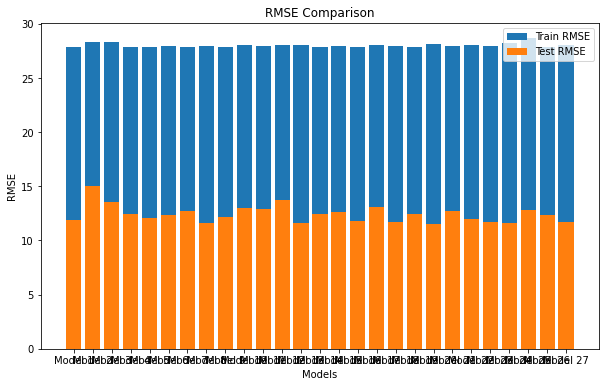

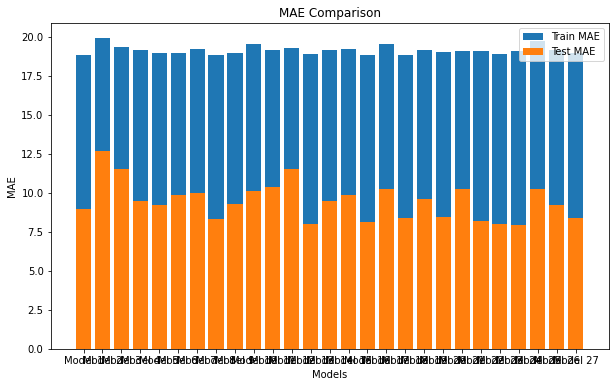

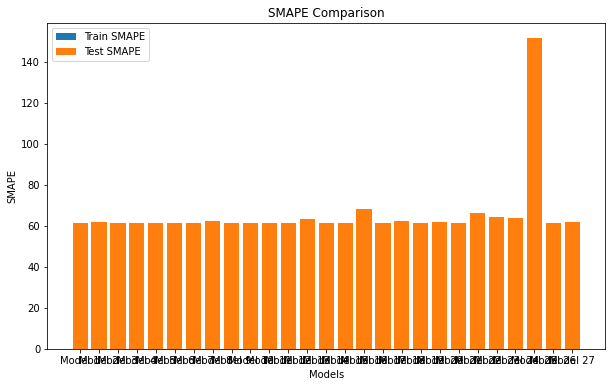

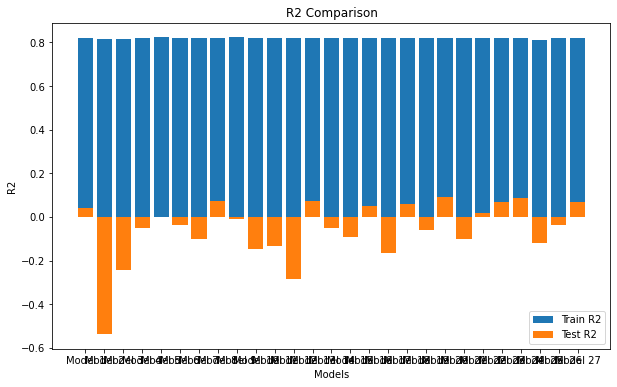

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time
import psutil


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]


# Train and evaluate the Stacked LSTM model
def train_evaluate_model(train_data, test_data, lstm_units, lstm_epochs, lstm_batch_size):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Reshape the input data for LSTM
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    # Build the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(lstm_units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the Stacked LSTM model
    start_time = time.time()
    model.fit(X_train, y_train, epochs=lstm_epochs, batch_size=lstm_batch_size, verbose=0)
    end_time = time.time()

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Get execution time, CPU usage, and memory usage
    execution_time = end_time - start_time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6  # MB

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage


# Define hyperparameters to tune
lstm_units_values = [32, 64, 128]
lstm_epochs_values = [50, 100, 150]
lstm_batch_size_values = [16, 32, 64]

# Grid for hyperparameters
param_grid = []
for lstm_units in lstm_units_values:
    for lstm_epochs in lstm_epochs_values:
        for lstm_batch_size in lstm_batch_size_values:
            params = {'lstm_units': lstm_units, 'lstm_epochs': lstm_epochs, 'lstm_batch_size': lstm_batch_size}
            param_grid.append(params)

# Initialize lists to store evaluation metrics
train_rmses = []
test_rmses = []
train_maes = []
test_maes = []
train_smapes = []
test_smapes = []
train_r2s = []
test_r2s = []
execution_times = []
cpu_usages = []
memory_usages = []

# Perform hyperparameter tuning and evaluate models
for params in param_grid:
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage = train_evaluate_model(
        train_data, test_data, params['lstm_units'], params['lstm_epochs'], params['lstm_batch_size']
    )

    # Append evaluation metrics and resource usages
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    train_smapes.append(train_smape)
    test_smapes.append(test_smape)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    execution_times.append(execution_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage)

    # Print the results for the current model
    print(f"Model: LSTM Units={params['lstm_units']}, Epochs={params['lstm_epochs']}, Batch Size={params['lstm_batch_size']}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train SMAPE: {train_smape:.2f}")
    print(f"Test SMAPE: {test_smape:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")
    print(f"Execution Time: {execution_time:.2f} seconds")
    print(f"CPU Usage: {cpu_usage:.2f} MHz")
    print(f"Memory Used: {memory_usage:.2f} MB")
    print()

# Plot the RMSE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_rmses, label='Train RMSE')
plt.bar(range(len(param_grid)), test_rmses, label='Test RMSE')
plt.xticks(range(len(param_grid)), [f"Model {i+1}" for i in range(len(param_grid))])
plt.title('RMSE Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot the MAE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_maes, label='Train MAE')
plt.bar(range(len(param_grid)), test_maes, label='Test MAE')
plt.xticks(range(len(param_grid)), [f"Model {i+1}" for i in range(len(param_grid))])
plt.title('MAE Comparison')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot the SMAPE for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_smapes, label='Train SMAPE')
plt.bar(range(len(param_grid)), test_smapes, label='Test SMAPE')
plt.xticks(range(len(param_grid)), [f"Model {i+1}" for i in range(len(param_grid))])
plt.title('SMAPE Comparison')
plt.xlabel('Models')
plt.ylabel('SMAPE')
plt.legend()
plt.show()

# Plot the R2 for all models
plt.figure(figsize=(10, 6))
plt.bar(range(len(param_grid)), train_r2s, label='Train R2')
plt.bar(range(len(param_grid)), test_r2s, label='Test R2')
plt.xticks(range(len(param_grid)), [f"Model {i+1}" for i in range(len(param_grid))])
plt.title('R2 Comparison')
plt.xlabel('Models')
plt.ylabel('R2')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import time
import psutil


# Load the data
data = pd.read_csv('C:/Users/Storm/Downloads/SN_m_tot_V2.0.csv', delimiter=';', header=None)
data.columns = ['Year', 'Month', 'Date', 'Monthly Mean Total Sunspot Number', 'Uncertainty', 'Observations', 'Definitive/Provisional']

# Select the 'Monthly Mean Total Sunspot Number' column as the target variable
target = data['Monthly Mean Total Sunspot Number'].values.reshape(-1, 1)

# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = scaler.fit_transform(target)

# Split the data into training and testing sets
train_size = 720  # Number of months for training
test_size = 72  # Number of months for testing

train_data = target_scaled[:train_size]
test_data = target_scaled[train_size:train_size+test_size]


# Train and evaluate the Random Forest model
def train_evaluate_model(train_data, test_data, n_estimators):
    X_train, y_train = train_data[:-1], train_data[1:]
    X_test, y_test = test_data[:-1], test_data[1:]

    # Create and train the Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Invert the scaling
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)

    # Calculate SMAPE
    train_smape = np.mean(np.abs((y_train - train_predictions) / (y_train + train_predictions))) * 100
    test_smape = np.mean(np.abs((y_test - test_predictions) / (y_test + test_predictions))) * 100

    # Calculate R2
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Get execution time, CPU usage, and memory usage
    execution_time = 0  # Random Forest doesn't require training time
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().used / 1e6  # MB

    return train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage


# Define hyperparameters to tune
n_estimators_values = [100, 200, 300]

# Grid for hyperparameters
param_grid = []
for n_estimators in n_estimators_values:
    params = {'n_estimators': n_estimators}
    param_grid.append(params)

# Lists to store the results
train_rmse_results = []
test_rmse_results = []
train_mae_results = []
test_mae_results = []
train_smape_results = []
test_smape_results = []
train_r2_results = []
test_r2_results = []
execution_time_results = []
cpu_usage_results = []
memory_usage_results = []

# Train and evaluate the model for each set of hyperparameters
for params in param_grid:
    train_rmse, test_rmse, train_mae, test_mae, train_smape, test_smape, train_r2, test_r2, execution_time, cpu_usage, memory_usage = train_evaluate_model(
        train_data, test_data, params['n_estimators']
    )

    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_mae_results.append(train_mae)
    test_mae_results.append(test_mae)
    train_smape_results.append(train_smape)
    test_smape_results.append(test_smape)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)
    execution_time_results.append(execution_time)
    cpu_usage_results.append(cpu_usage)
    memory_usage_results.append(memory_usage)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_rmse_results, label='Train RMSE')
plt.plot(n_estimators_values, test_rmse_results, label='Test RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Random Forest - RMSE vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_mae_results, label='Train MAE')
plt.plot(n_estimators_values, test_mae_results, label='Test MAE')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('Random Forest - MAE vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_smape_results, label='Train SMAPE')
plt.plot(n_estimators_values, test_smape_results, label='Test SMAPE')
plt.xlabel('n_estimators')
plt.ylabel('SMAPE')
plt.title('Random Forest - SMAPE vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_r2_results, label='Train R2')
plt.plot(n_estimators_values, test_r2_results, label='Test R2')
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.title('Random Forest - R2 vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, execution_time_results, label='Execution Time')
plt.xlabel('n_estimators')
plt.ylabel('Time (s)')
plt.title('Random Forest - Execution Time vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, cpu_usage_results, label='CPU Usage')
plt.xlabel('n_estimators')
plt.ylabel('CPU Usage (%)')
plt.title('Random Forest - CPU Usage vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, memory_usage_results, label='Memory Usage')
plt.xlabel('n_estimators')
plt.ylabel('Memory Usage (MB)')
plt.title('Random Forest - Memory Usage vs. n_estimators')
plt.legend()
plt.grid(True)
plt.show()
